In [1]:
import numpy as np
import matplotlib as ml
import matplotlib.pyplot as plt
import ioeddy as io 
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
import cmocean
import palettable
import struct as st
from scipy import signal

#os.environ['PATH'] = os.environ['PATH'] + ':/Library/TeX/texbin/'

fss = 12;
fsl = 15;

sns.set_context('paper')
sns.set(color_codes=True, font_scale=1.75)
#sns.set_palette('PuBuGn_d')
sns.set_style('ticks', {'font.family'     : ['serif'],
                        'font.serif'      : ['Times'],
                        'xtick.major.size': 3.0,
                        'xtick.minor.size': 1.5,
                        'ytick.major.size': 3.0,
                        'ytick.minor.size': 1.5,
                        'axes.edgecolor'  : 'k',
                        'axes.labelcolor' : 'k',
                        'text.color'      : 'k',
                        'xtick.color'     : 'k',
                        'ytick.color'     : 'k',
                        'image.cmap'      : 'PuBuGn'})


plt.rc('figure', figsize=[8.0, 5.0])

plt.rc('mathtext', fontset='stix')

plt.rc('axes', linewidth=1.0)
plt.rc('xtick.major', width=1.0)
plt.rc('ytick.major', width=1.0)
plt.rc('xtick.minor', width=1.0)
plt.rc('ytick.minor', width=1.0)

plt.rc('font', size=fss)
plt.rc('xtick', labelsize=fss)
plt.rc('ytick', labelsize=fss)
plt.rc('axes', labelsize=fsl)
plt.rc('axes', titlesize=fss)

plt.rc('lines', linewidth=1.0)
plt.rc('lines', markersize=4.0)

plt.rc('pdf', fonttype=3)
plt.rc('ps', fonttype=3)
plt.rc('text', usetex=True)

plt.rc('font',**{'family':'serif','serif':['Times']})

plt.rc('text.latex', preamble=[r"\usepackage[T1]{fontenc}", r"\usepackage{amsmath}"])



/home/jose/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
def read5p2(filename):
#remember: f.seek(),f.tell()
#reads energy 5p planes
        f = open(filename,'rb')

        _,i,j,k,jp,_ = st.unpack('i'*6,f.read(24))
        
        #k=1182-1
        k=1489
        #k=1852-3
        
        data=np.zeros([i,j,k],dtype=float)

        for kk in range (0,k):
    
                dummy1 = st.unpack('i',f.read(4))    
                data[:,:,kk]=np.reshape(st.unpack('d'*i*j,f.read(8*i*j)),(i,j),order='F')
                dummy2 = st.unpack('i',f.read(4))
    
                if dummy1!=dummy2:
                        print('Error reading',kk)
                        break
        
        
        #_,it,_,_,time,_,_,dt,grav,_=st.unpack('iiiidiiddi',f.read(4*7+3*8))
        
        
        #_,it,_,_,time,_,_,dt,grav,_,_,kmin5p,kmax5p,nzg=st.unpack('iiiidiiddiiiii',f.read(4*11+3*8)) 


        #return i,j,k,it,time,dt,grav,kmin5p,kmax5p,data
        #return i,j,k,it,time,dt,grav,data
        return i,j,k,data

In [3]:
#it is necessary to read a proper 5p file to get some data

path = './'
file = 'W_MEAN.res'
filename = path + file 
var = file[0]

f = open(filename,'rb')
_,i,j,k,jp,_ = st.unpack('i'*6,f.read(24))


#i,j,k,data = io.read5p(filename)

In [4]:
k=1489
data=np.zeros([i,j,k],dtype=float)


In [5]:
for kk in range (0,k):
    dummy1 = st.unpack('i',f.read(4))
    #print(dummy1)
    data[:,:,kk]=np.reshape(st.unpack('d'*i*j,f.read(8*i*j)),(i,j),order='F')
    dummy2 = st.unpack('i',f.read(4))
    #print(dummy2)

In [6]:
#_,it,_,_,time,_,_,dt,grav,_=st.unpack('iiiidiiddi',f.read(4*7+3*8))

In [7]:
dummy2 = st.unpack('i',f.read(4))

In [8]:
dummy2

(709280,)

In [9]:
st.unpack('i',f.read(4))

(614018692,)

In [10]:
data.shape

(682, 130, 1489)

In [11]:
nx, index, x, xe, xc = io.readgrid('../sphere_R3.7E3_F1/x3_grid_F1.in')
nr, index, r, re, rc = io.readgrid('../sphere_R3.7E3_F1/x1_grid_F1.in')
nth, index, th, the, thc = io.readgrid('/work/res_interpolation/x2_grid.in')

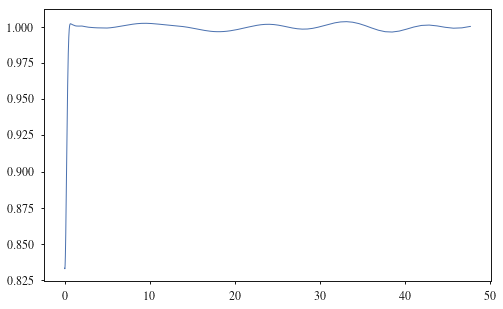

In [12]:
plt.plot(rc[:-10],data[:,32,-1]);plt.show()

In [13]:
kmin5p=218
kmax5p=983
nzg=nx-1
rc=rc[:-10]

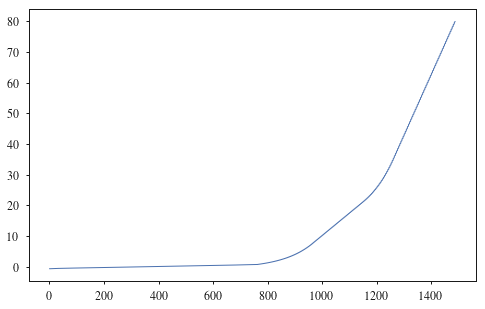

In [14]:
xe5p=xe[kmin5p-1:kmax5p-1]

xcc=kmax5p-1+20

nk=1
for ii in range(1,np.int(np.floor((nzg-2-kmax5p)/20.0))+1): #range(1,k-(kmax5p-kmin5p))
        
    xcc0=kmax5p-1+nk*20-2
    xcc1=kmax5p-1+nk*20-1
    xcc2=kmax5p-1+nk*20
    xcc3=kmax5p-1+nk*20+1
    #xcc4=kmax5p-1+nk*20+2
    
    xe5p=np.append(xe5p,[xe[xcc0]],axis=0)
    xe5p=np.append(xe5p,[xe[xcc1]],axis=0)
    xe5p=np.append(xe5p,[xe[xcc2]],axis=0)
    xe5p=np.append(xe5p,[xe[xcc3]],axis=0)
    #xe5p=np.append(xe5p,[xe[xcc4]],axis=0)
    
    nk = nk +1
    
plt.plot(xe5p);plt.show()

In [15]:
xe5p.shape

(1489,)

In [16]:
data.shape

(682, 130, 1489)

In [17]:
data_ng = data[1:,:,:-1]       # remove radial ghost cell
#data_ng=data
data_ng[:,0,:]=data_ng[:,1,:] # update azymuthal ghost cells
data_ng[:,-1,:]=data_ng[:,-2,:] 

#data_slice_2 = data_ng[:,io.loc(thc,3.1415/2),:]
#data_slice_3 = data_ng[:,io.loc(thc,3*3.1415/2),:]
data_slice_2 = data_ng[:,io.loc(thc,3.1415/2),:]
data_slice_3 = data_ng[:,io.loc(thc,3*3.1415/2),:]

data_slice_4 =np.concatenate((np.flip(data_slice_3,axis=0),data_slice_2),axis=0)

xedges = xe5p[:-1]
#xedges[0]=0
rcng=rc[1:];
yedges2 = np.concatenate((-rcng[::-1],rcng[:]),axis=0)
#yedges=yedges[1:-1]
X2,Y2 =np.meshgrid(xedges, yedges2)

In [18]:
df_X2 = pd.DataFrame(X2,    index=yedges2, columns=xedges)
df_Y2 = pd.DataFrame(Y2,    index=yedges2, columns=xedges)
df_U2 = pd.DataFrame(data_slice_4, index=yedges2, columns=xedges)

xmin = -2.5
xmax = 5
ymin = -3
ymax = 3

roi2 = (xmin <= df_X2) & (df_X2 <= xmax) & (ymin <= df_Y2) & (df_Y2 <= ymax)

df_X2_crop = df_X2[roi2].dropna(axis=[0,1], how='all')
df_Y2_crop = df_Y2[roi2].dropna(axis=[0,1], how='all')
df_U2_crop = df_U2[roi2].dropna(axis=[0,1], how='all')

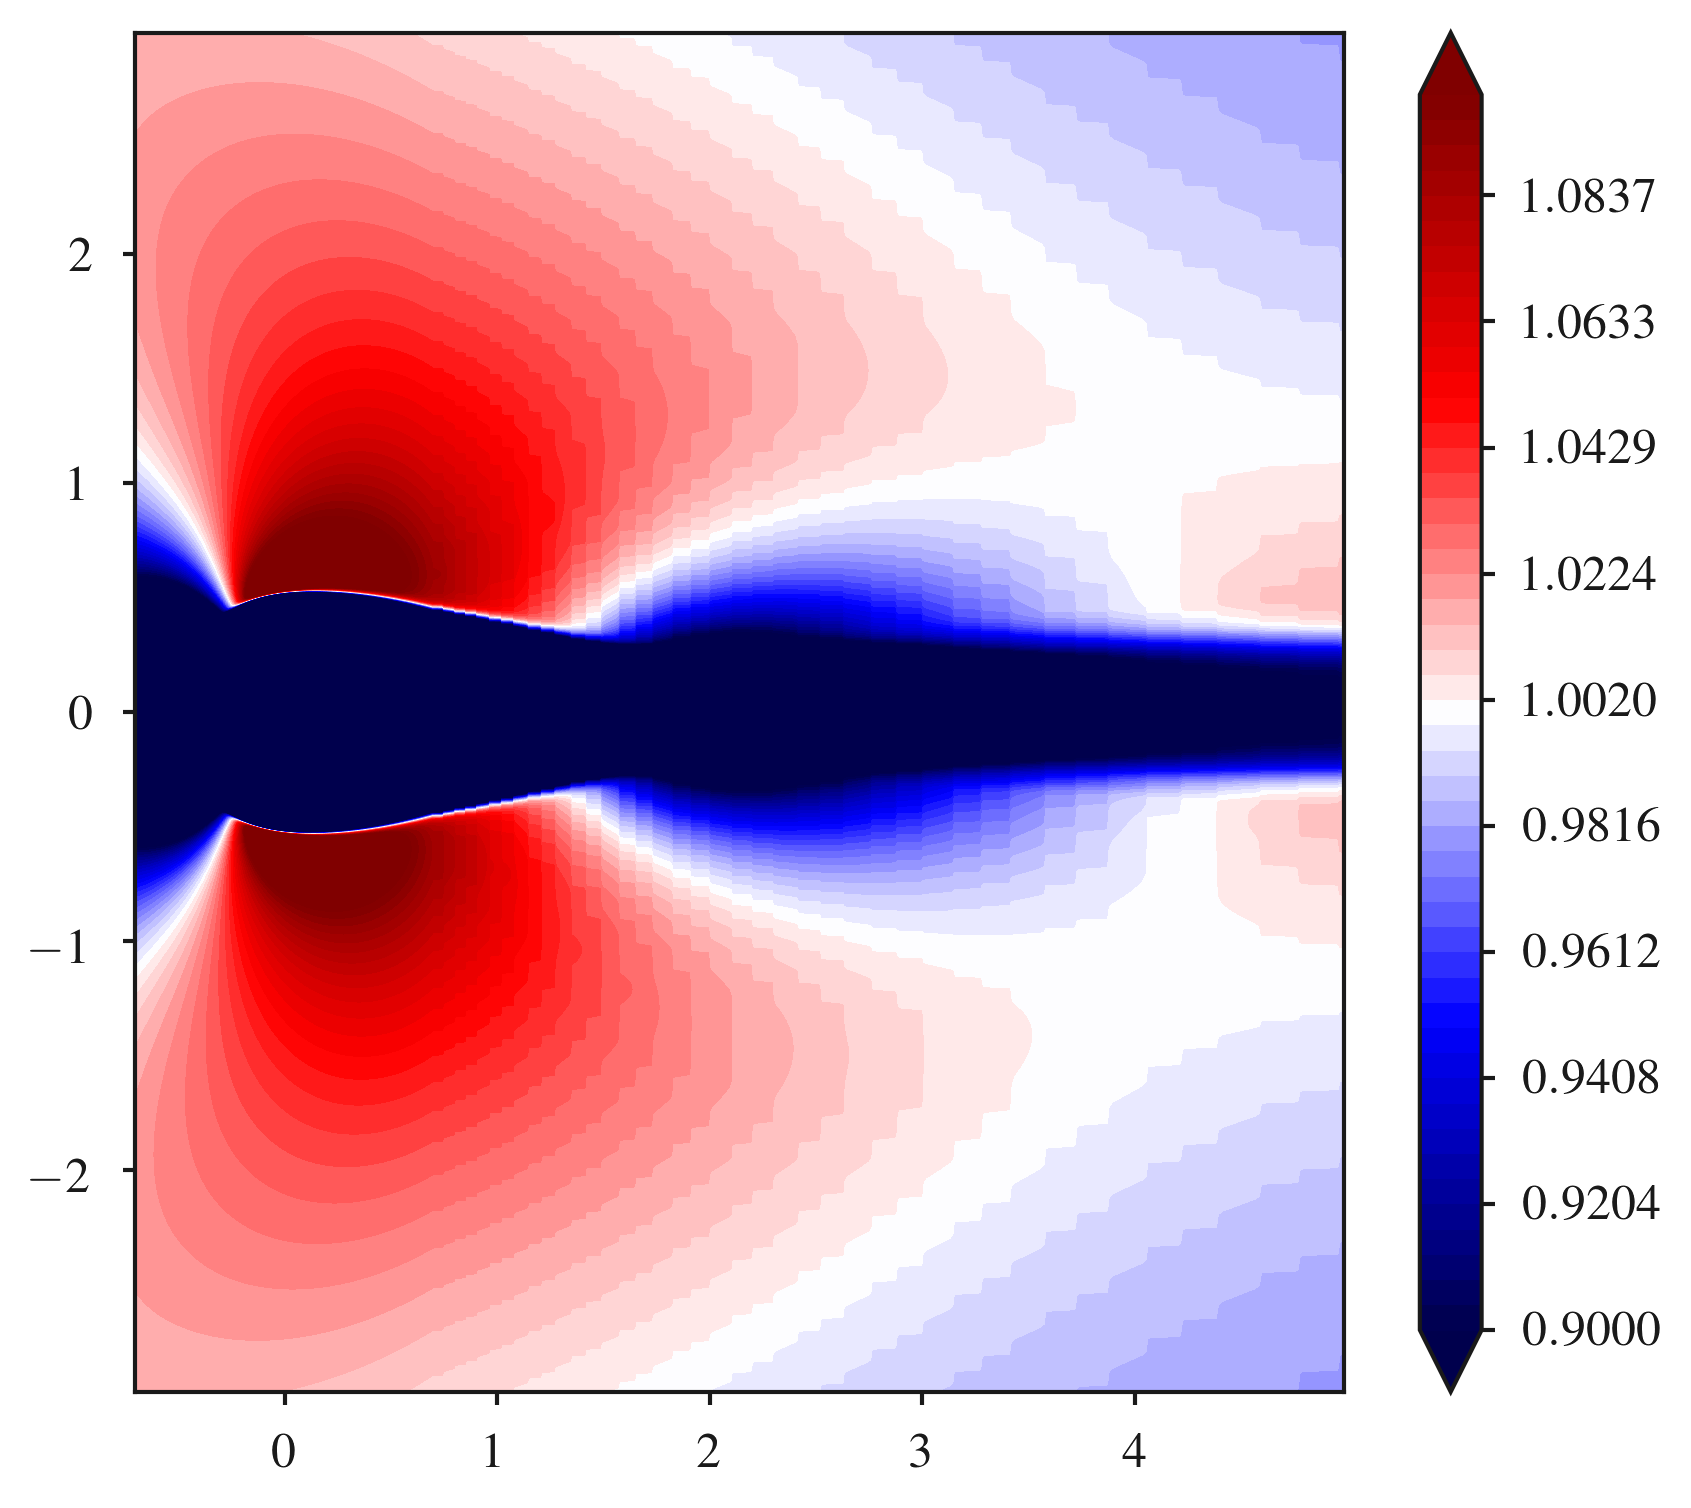

In [19]:
fig2 = plt.figure(figsize=(6.5,6), dpi=300)
gsp2 = gridspec.GridSpec(1,1)
plt.subplot(gsp2[0,0])
lvls = np.linspace(np.min(data_ng),np.max(data_ng)*1,50)
#lvls = np.linspace(0.9,1.1,50)
lvls = np.linspace(0.9,1.1,50)
plt.contourf(df_X2_crop, df_Y2_crop, df_U2_crop,levels=lvls,cmap='seismic',extend='both')#hsv

#plt.pcolormesh(df_X2_crop, df_Y2_crop, df_U2_crop,levels=lvls)
plt.colorbar()
plt.show()

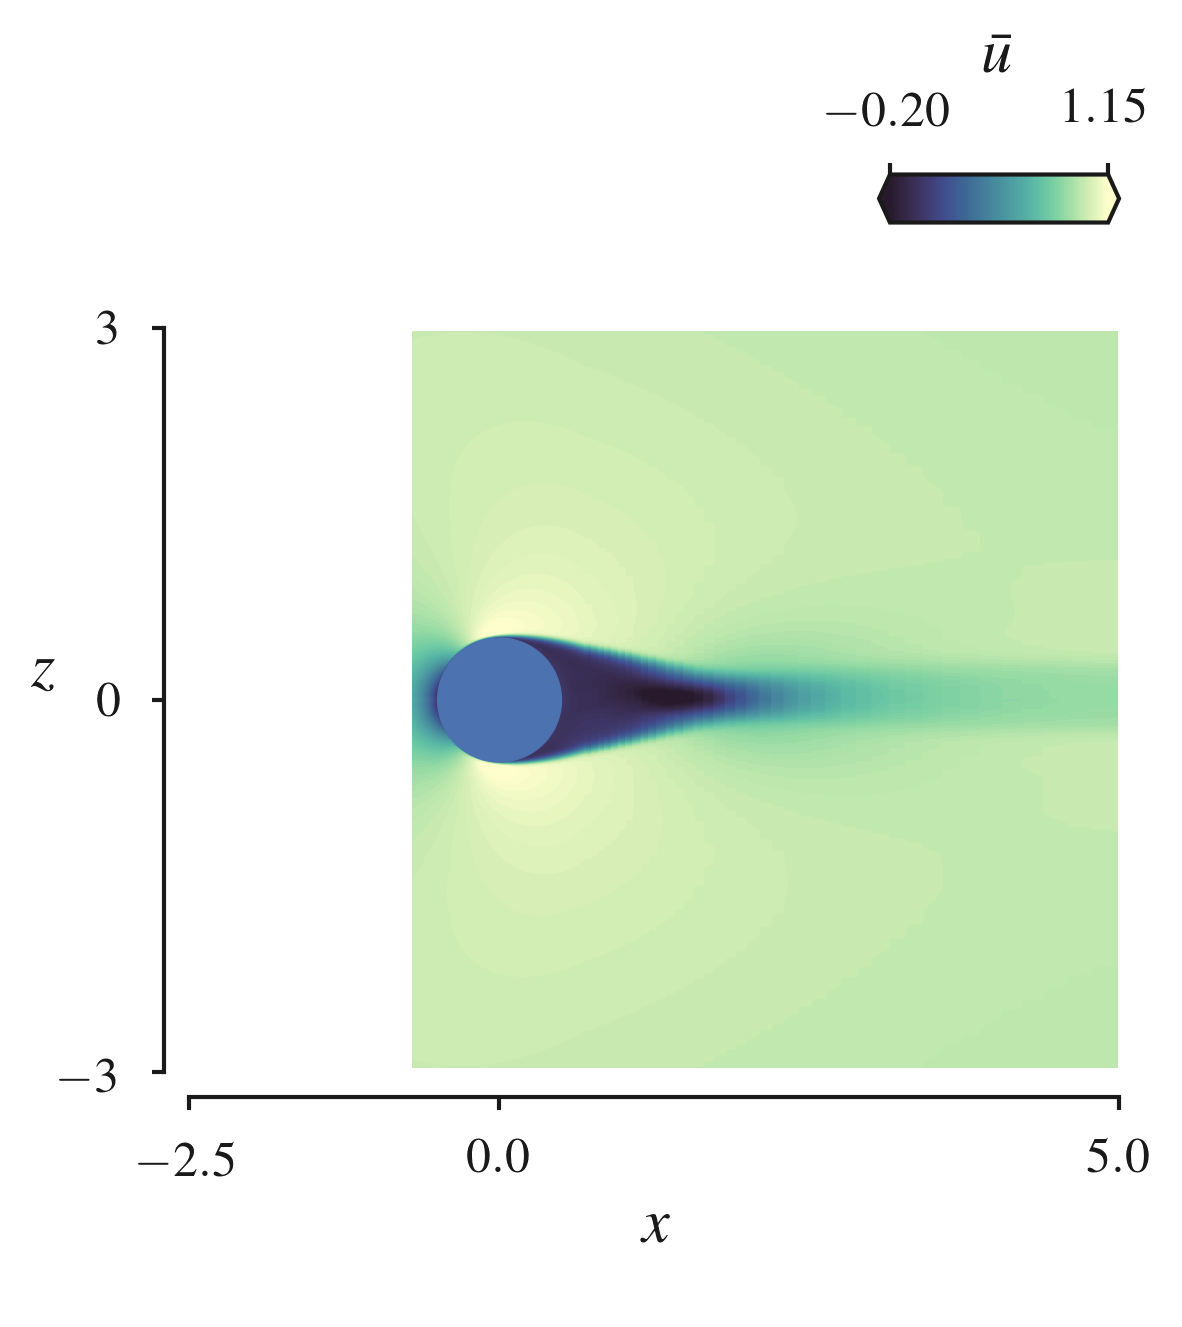

In [20]:
    #fig = plt.figure(figsize=(9.5,2.5), dpi=300)
    fig = plt.figure(figsize=(4,4), dpi=300)

    gsp = gridspec.GridSpec(1,1)

    ax0 = plt.subplot(gsp[0,0])

    cmap = cmocean.cm.deep_r
    #cmap = 'summer'
    #cmap = cmocean.cm.matter_r
    #cmap = 'inferno'
    
    #lvls = np.linspace(-0.2,1.15,51)
    lvls = np.linspace(-0.2,1.15,101)

    cs0 = ax0.contourf(df_X2_crop, df_Y2_crop, df_U2_crop, levels=lvls, cmap=cmap, extend='both')

    #add extend="both" to the options in contourf

    # Fill the body:
    xs = np.linspace(-0.499,0.499,50)
    xs = 0.5*np.sin(xs*np.pi)
    ys = np.sqrt(0.5**2-(xs)**2)
    ax0.fill_between(xs,-ys, ys, interpolate=True, color='b')
 
 
 
    ax0.set_aspect(1.0)

    sns.despine(ax=ax0, offset=6)

    ax0.set_xlim([xmin, xmax])
    ax0.set_ylim([ymin, ymax])

    #xt = np.linspace(xmin, xmax, 5)
    xt = np.array([-2.5,0,5])
    #xt = np.array([-2.5,0,5,10])

    yt = np.array([-ymax, 0, ymax])

    ax0.set_xticks(xt)
    ax0.set_yticks(yt)

    ax0.set_xlabel(r'$x$')
    ax0.set_ylabel(r'$z$', rotation=0) #labelpad=12)
#    cbaxes = fig.add_axes([0.8, 0.9, 0.1, 0.04])
    cbaxes = fig.add_axes([0.7, 0.9, 0.2, 0.04])
#    cb = plt.colorbar(cs0, cax = cbaxes, orientation='horizontal', ticks=[-0.2,1.15])
    cb = plt.colorbar(cs0, cax = cbaxes, orientation='horizontal', ticks=[-0.2,1.15])

    cb.ax.xaxis.set_ticks_position('top')
    cb.ax.xaxis.set_label_position('top')
#    cb.set_label(r"$U$")
    cb.set_label(r"$\bar{u}$")
    
    ax0.annotate('$Fr=1$',xy=(10,1),xytext=(0,19),fontsize=fsl)
    

#    plt.savefig('/home/jose/Dropbox/aux/draft/figures/sphere_R3.7E3_F1_mean_u.png', bbox_inches='tight', pad_inches=0.02, dpi=300)
    plt.show()
    #end = time.time()

In [21]:
plt.plot(data[:io.loc(rc,0.5)],io.loc(thc,3.14159))

ValueError: x and y must have same first dimension, but have shapes (291, 130, 1489) and (1,)

In [22]:
io.loc(np.pi,thc)

64

In [23]:
(thc[64]+thc[65])/2

3.14159275

In [24]:
thc[65]

3.1661364999999999

In [29]:
ylim=291
y_profile=rc[:ylim]

yhlim=io.loc(rc,1)
yh_profile=rc[:yhlim]

profile_1=0.5*(data[:ylim,32,io.loc(1,xe5p)]+data[:ylim,33,io.loc(0.5+0.5,xe5p)])
profile_2=0.5*(data[:ylim,32,io.loc(2,xe5p)]+data[:ylim,33,io.loc(0.5+1,xe5p)])
profile_3=0.5*(data[:ylim,32,io.loc(3,xe5p)]+data[:ylim,33,io.loc(0.5+2,xe5p)])
profile_4=0.5*(data[:ylim,32,io.loc(4,xe5p)]+data[:ylim,33,io.loc(0.5+3,xe5p)])
profile_5=0.5*(data[:ylim,32,io.loc(5,xe5p)]+data[:ylim,33,io.loc(0.5+4,xe5p)])


profile_1h=0.5*(data[:yhlim,64,io.loc(1,xe5p)]+data[:yhlim,65,io.loc(0.5+0.5,xe5p)])
profile_2h=0.5*(data[:yhlim,64,io.loc(2,xe5p)]+data[:yhlim,65,io.loc(0.5+1,xe5p)])
profile_3h=0.5*(data[:yhlim,64,io.loc(3,xe5p)]+data[:yhlim,65,io.loc(0.5+2,xe5p)])
profile_4h=0.5*(data[:yhlim,64,io.loc(4,xe5p)]+data[:yhlim,65,io.loc(0.5+3,xe5p)])
profile_5h=0.5*(data[:yhlim,64,io.loc(5,xe5p)]+data[:yhlim,65,io.loc(0.5+4,xe5p)])

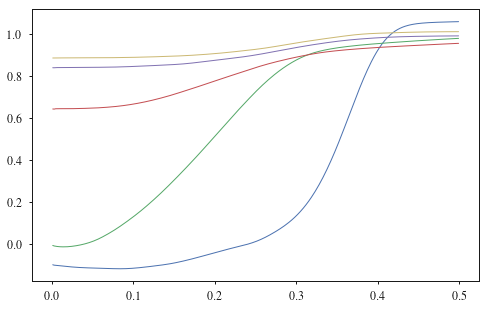

In [30]:
plt.plot(y_profile,profile_1,y_profile,profile_2,
        y_profile,profile_3,y_profile,profile_4,
        y_profile,profile_5);plt.show()

In [34]:
fig = plt.figure(figsize=(1*384/72,0.5*384/72),dpi=300)

gs = gridspec.GridSpec(1,1)

ax = plt.subplot(111)

#ax.plot(y_profile,profile_0,y_profile,profile_1,y_profile,profile_2)
sns.set_palette('tab10')

ax.plot(y_profile,profile_1,y_profile,profile_2,
        y_profile,profile_3,y_profile,profile_4,
        y_profile,profile_5)


#ax.set_xlim([-1.2, 1.2])
#ax.set_ylim([0, 1.2])



#plt.title(r'$x=1.5$')
sns.despine(offset=5)


#plt.setp(p[0],color='tab:blue')
#plt.setp(p[1],color='tab:red',linewidth=1.0,linestyle='dashed')


ax.set_xlabel(r'$r$')
ax.set_ylabel(r'$\bar{u}$', rotation=0, labelpad=12)

#ax.legend(['x=1','x=2','x=3','x=4','x=5'],fontsize=fss,loc=[1.1,0.5])
ax.legend(['$\Delta x=0.5$','$\Delta x=1$','$\Delta x=2$','$\Delta x=3$','$\Delta x=4$'],fontsize=fss,loc=[1.1,0.5])


plt.title('Sphere vertical profiles $Fr=1$')
#ax.annotate('SphereVertical profile', xy=(0.01, 1.1), xytext=(0.01, 1.1),color='k',fontsize=12)
#ax.annotate(r'$0.25$', xy=(0.25, 0.4), xytext=(0.005, 0.4),color='tab:red',fontsize=6)

plt.savefig('/home/jose/Dropbox/aux/draft/figures/sphere_F1_u_mean_vert_profiles_2.png', bbox_inches='tight', pad_inches=0.02, dpi=300)
#plt.show()

In [35]:
fig = plt.figure(figsize=(1*384/72,0.5*384/72),dpi=300)

gs = gridspec.GridSpec(1,1)

ax = plt.subplot(111)

#ax.plot(y_profile,profile_0,y_profile,profile_1,y_profile,profile_2)

ax.plot(yh_profile,profile_1h,yh_profile,profile_2h,
        yh_profile,profile_3h,yh_profile,profile_4h,
        yh_profile,profile_5h)


#ax.set_xlim([-1.2, 1.2])
#ax.set_ylim([0, 1.2])



#plt.title(r'$x=1.5$')
sns.despine(offset=5)


#plt.setp(p[0],color='tab:blue')
#plt.setp(p[1],color='tab:red',linewidth=1.0,linestyle='dashed')


ax.set_xlabel(r'$r$')
ax.set_ylabel(r'$\bar{u}$', rotation=0, labelpad=12)

#ax.legend(['x=1','x=2','x=3','x=4','x=5'],fontsize=fss,loc=[1.1,0.5])
ax.legend(['$\Delta x=0.5$','$\Delta x=1$','$\Delta x=2$','$\Delta x=3$','$\Delta x=4$'],fontsize=fss,loc=[1.1,0.5])


plt.title('Sphere horizontal profiles $Fr=1$')
#ax.annotate('SphereVertical profile', xy=(0.01, 1.1), xytext=(0.01, 1.1),color='k',fontsize=12)
#ax.annotate(r'$0.25$', xy=(0.25, 0.4), xytext=(0.005, 0.4),color='tab:red',fontsize=6)

plt.savefig('/home/jose/Dropbox/aux/draft/figures/sphere_F1_u_mean_hori_profiles_2.png', bbox_inches='tight', pad_inches=0.02, dpi=300)
#plt.show()